In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
pip install kneed

Note: you may need to restart the kernel to use updated packages.


In [3]:
df = pd.read_csv(r"C:\Users\Bigas\Desktop\JupyterNotebooks\Emigration Dataset\emigration_dataset.csv")

In [4]:
print(df.isnull().sum())

year                   0
gender                 0
major_country          0
civil_status        4015
age_group              0
educ_status            0
occupation_group       0
job_class              0
region               288
province             288
city_complete        288
dtype: int64


In [5]:
df.head()

,year,gender,major_country,civil_status,age_group,educ_status,occupation_group,job_class,region,province,city_complete
0,2020,MALE,USA,Single,14 - Below,Not of Schooling Age,EMPLOYED,"Prof'l, Tech'l, & Related Workers",Region I - Ilocos Region,ILOCOS NORTE,"ADAMS, (ILOCOS NORTE)"
1,2020,MALE,USA,Single,14 - Below,Not of Schooling Age,EMPLOYED,"Prof'l, Tech'l, & Related Workers",Region I - Ilocos Region,ILOCOS NORTE,"ADAMS, (ILOCOS NORTE)"
2,2020,MALE,USA,Single,14 - Below,Not of Schooling Age,EMPLOYED,"Prof'l, Tech'l, & Related Workers",Region I - Ilocos Region,ILOCOS NORTE,"ADAMS, (ILOCOS NORTE)"
3,2020,MALE,USA,Single,14 - Below,Not of Schooling Age,EMPLOYED,"Prof'l, Tech'l, & Related Workers",Region I - Ilocos Region,ILOCOS NORTE,"BACARRA, (ILOCOS NORTE)"
4,2020,MALE,USA,Single,14 - Below,Not of Schooling Age,EMPLOYED,"Prof'l, Tech'l, & Related Workers",Region I - Ilocos Region,ILOCOS NORTE,"BACARRA, (ILOCOS NORTE)"


In [6]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

for column in df.columns:
    if df[column].dtype == 'object' or df[column].dtype == 'string':
        df[column] = label_encoder.fit_transform(df[column])

In [7]:
df.head()

,year,gender,major_country,civil_status,age_group,educ_status,occupation_group,job_class,region,province,city_complete
0,2020,1,10,2,0,9,0,9,4,63,5
1,2020,1,10,2,0,9,0,9,4,63,5
2,2020,1,10,2,0,9,0,9,4,63,5
3,2020,1,10,2,0,9,0,9,4,63,167
4,2020,1,10,2,0,9,0,9,4,63,167


In [8]:
df["educ_status"].value_counts()

educ_status
0     101614
1      51677
5      42193
3      37464
4      34404
9      20998
12     14529
2       7451
10      4844
13      4781
11      2493
8        611
6        394
7        266
Name: count, dtype: int64

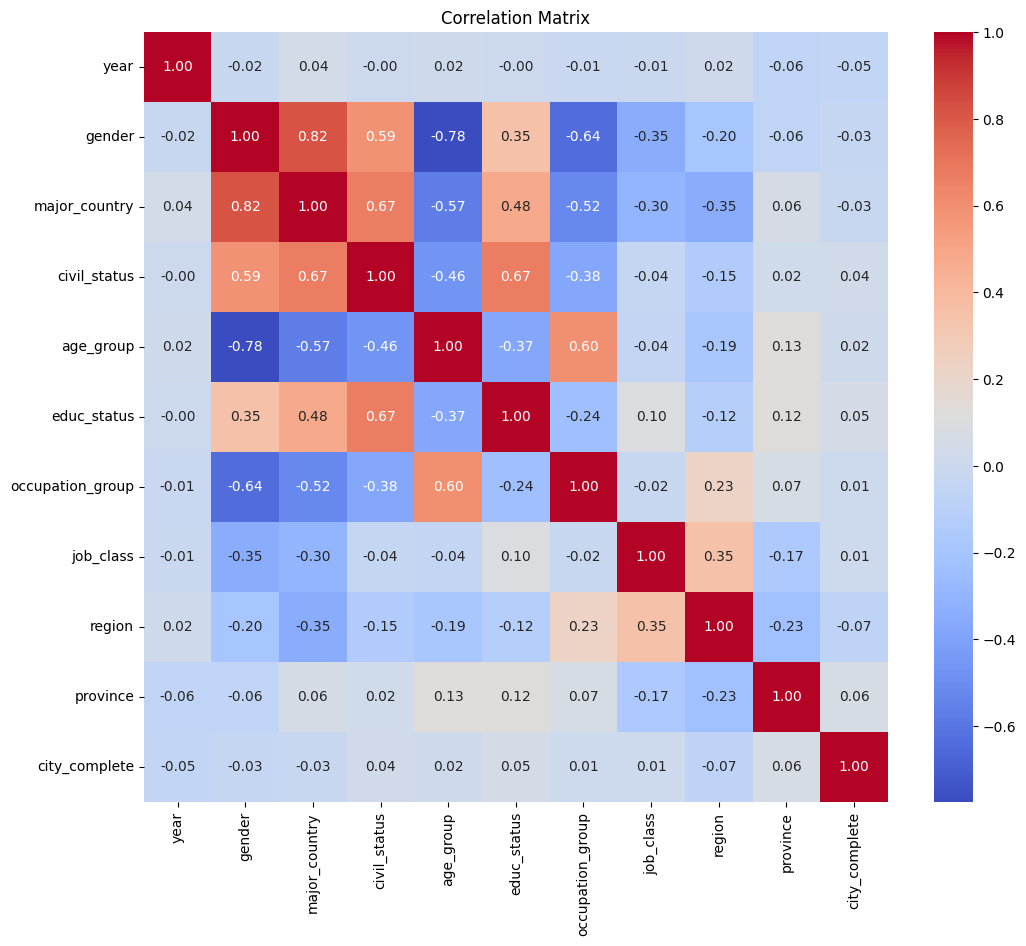

In [9]:
correlation_matrix = df.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

In [10]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

selected_features = ["job_class", "educ_status", "major_country", "gender", "age_group"]
df_selected = df[selected_features].copy()

encoder = LabelEncoder()
for col in df_selected.columns:
    df_selected[col] = encoder.fit_transform(df_selected[col])

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_selected)

In [11]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)

PC1: 0.5550 (0.5550 cumulative)
PC2: 0.2317 (0.7868 cumulative)


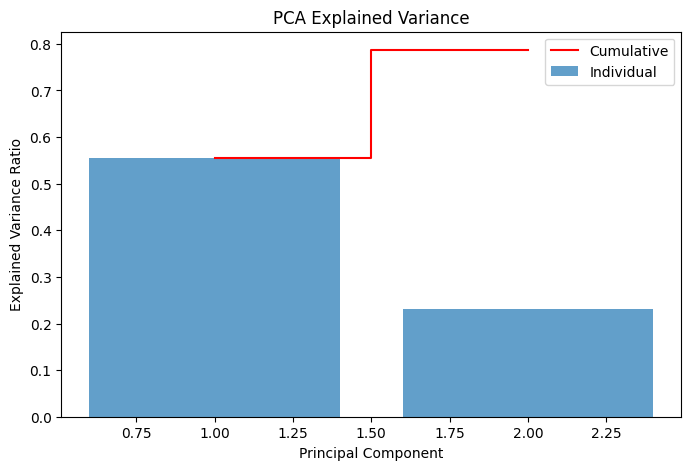

In [12]:
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance_ratio)

# Print explained variance
for i, variance in enumerate(explained_variance_ratio):
    print(f"PC{i+1}: {variance:.4f} ({cumulative_variance[i]:.4f} cumulative)")

# Plot explained variance
plt.figure(figsize=(8, 5))
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, alpha=0.7, label="Individual")
plt.step(range(1, len(cumulative_variance) + 1), cumulative_variance, where="mid", label="Cumulative", color="red")
plt.xlabel("Principal Component")
plt.ylabel("Explained Variance Ratio")
plt.title("PCA Explained Variance")
plt.legend()
plt.show()

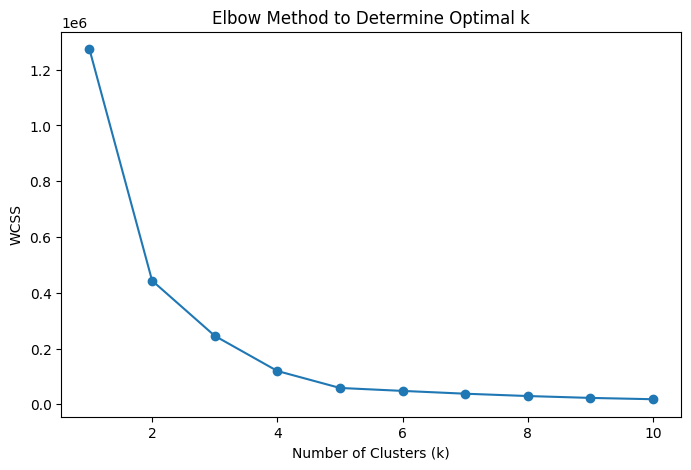

In [13]:
from sklearn.cluster import KMeans

wcss = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_pca)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker="o", linestyle="-")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("WCSS")
plt.title("Elbow Method to Determine Optimal k")
plt.show()

In [14]:
kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)
df_selected["KMeans Cluster"] = kmeans.fit_predict(df_pca)

print(df_selected.head())

   job_class  educ_status  major_country  gender  age_group  KMeans Cluster
0          9            9             10       1          0               3
1          9            9             10       1          0               3
2          9            9             10       1          0               3
3          9            9             10       1          0               3
4          9            9             10       1          0               3


In [15]:
print(df_scaled)

[[ 0.27322831  1.61828929  0.98103043  1.20316069 -1.13664085]
 [ 0.27322831  1.61828929  0.98103043  1.20316069 -1.13664085]
 [ 0.27322831  1.61828929  0.98103043  1.20316069 -1.13664085]
 ...
 [-0.45289396  1.3389598   0.03248369 -0.83114418  2.64278112]
 [-0.45289396  1.3389598   0.03248369 -0.83114418  2.64278112]
 [-0.45289396  1.3389598   0.03248369 -0.83114418  2.95773295]]


In [16]:
from sklearn.decomposition import PCA

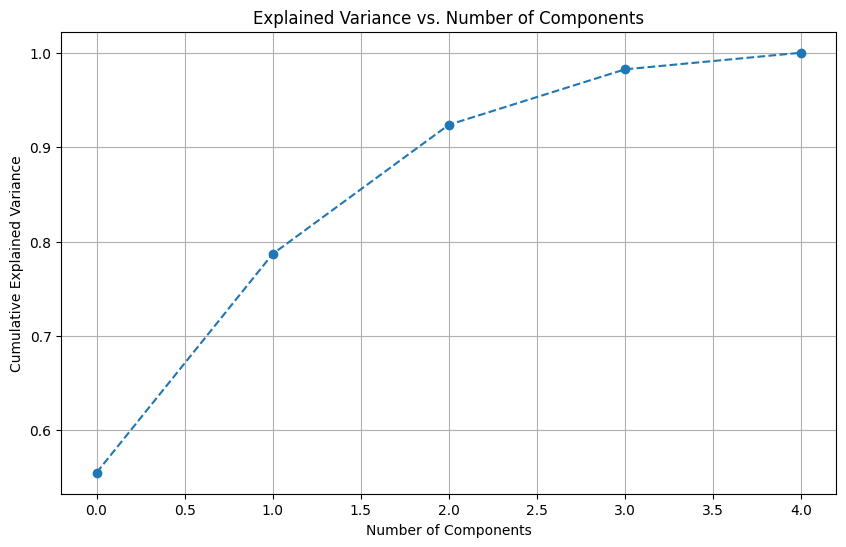

In [17]:
pca = PCA().fit(df_scaled)  # Fit PCA
explained_variance = np.cumsum(pca.explained_variance_ratio_)

plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o', linestyle='--')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance vs. Number of Components')
plt.grid()
plt.show()

In [18]:
from sklearn.metrics import silhouette_score

In [19]:
silhouette_avg = silhouette_score(df_pca, df_selected["KMeans Cluster"])
print(f"Silhouette Score for K={kmeans.n_clusters}: {silhouette_avg:.4f}")

Silhouette Score for K=5: 0.7472


In [20]:
df["KMeans Cluster"] = df_selected["KMeans Cluster"]
cluster_means = df.groupby("KMeans Cluster").mean()
print(cluster_means)

                       year    gender  major_country  civil_status  age_group  \
KMeans Cluster                                                                  
0               2017.506211  0.000000       1.211666      0.807090   4.270627   
1               2017.520565  0.990556      10.000000      2.000000   0.921217   
2               2017.492932  0.000000       2.979258      0.336436   7.311850   
3               2017.434506  1.000000      10.000000      2.000000   0.407809   
4               2017.619099  0.000000       6.809182      2.000000   2.861004   

                educ_status  occupation_group  job_class     region  \
KMeans Cluster                                                        
0                  1.373139          1.000000  12.698407  11.272965   
1                  4.365488          0.746511   1.908064   6.001144   
2                  0.537475          1.000000   5.840285   4.813007   
3                  5.055520          0.189222  10.146992   5.310280   
4     

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.boxplot(x="KMeans Cluster", y="job_class", data=df, palette="viridis")
plt.title("Job Classification Across Clusters")
plt.show()

plt.figure(figsize=(8, 5))
sns.boxplot(x="KMeans Cluster", y="educ_status", data=df, palette="plasma")
plt.title("Educational Background Across Clusters")
plt.show()

plt.figure(figsize=(8, 5))
sns.countplot(x="major_country", hue="KMeans Cluster", data=df, palette="Set2")
plt.xticks(rotation=45)
plt.title("Migration Destinations Across Clusters")
plt.show()

**DBSCAN**

In [21]:
from sklearn.neighbors import NearestNeighbors
from kneed import KneeLocator

In [22]:
df_sampledd = df_selected.sample(frac=0.10, random_state=42)

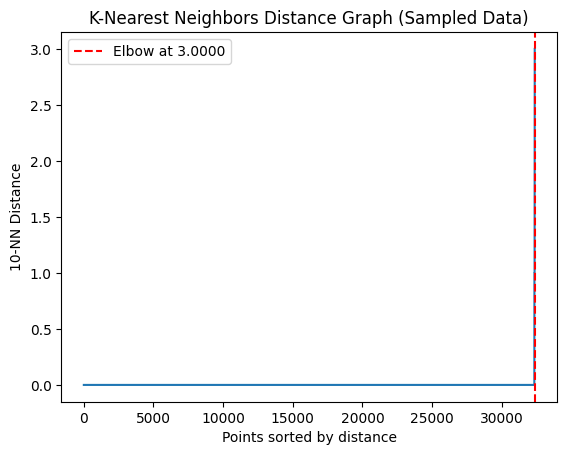

Optimal epsilon (eps) for DBSCAN (Sampled Data): 3.0000


In [23]:
k = 10  
nbrs = NearestNeighbors(n_neighbors=k).fit(df_sampledd)
distances, indices = nbrs.kneighbors(df_sampledd)

distances = np.sort(distances[:, k - 1], axis=0)

knee_locator = KneeLocator(range(len(distances)), distances, curve="convex", direction="increasing")
eps_optimal = distances[knee_locator.knee]

plt.plot(distances)
plt.axvline(x=knee_locator.knee, color='r', linestyle='--', label=f"Elbow at {eps_optimal:.4f}")
plt.xlabel("Points sorted by distance")
plt.ylabel(f"{k}-NN Distance")
plt.title("K-Nearest Neighbors Distance Graph (Sampled Data)")
plt.legend()
plt.show()

print(f"Optimal epsilon (eps) for DBSCAN (Sampled Data): {eps_optimal:.4f}")

print(df_pca)

from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=5, min_samples=10)
df_selected["DBSCAN_Cluster"] = dbscan.fit_predict(df_pca)

In [59]:
from sklearn.cluster import DBSCAN

df_sampledd = df_selected.sample(frac=0.10, random_state=42)
dbscan = DBSCAN(eps=2, min_samples=7)
df_sampledd["DBSCAN_Cluster"] = dbscan.fit_predict(df_sampledd)

In [60]:
print("Columns in dataset:", df_sampledd.columns)

Columns in dataset: Index(['job_class', 'educ_status', 'major_country', 'gender', 'age_group',
       'KMeans Cluster', 'DBSCAN_Cluster'],
      dtype='object')


In [61]:
df_sampledd = df_sampledd.rename(columns={0: 'PCA1', 1: 'PCA2'})

Columns in dataset: Index(['job_class', 'educ_status', 'major_country', 'gender', 'age_group',
       'KMeans Cluster', 'DBSCAN_Cluster'],
      dtype='object')


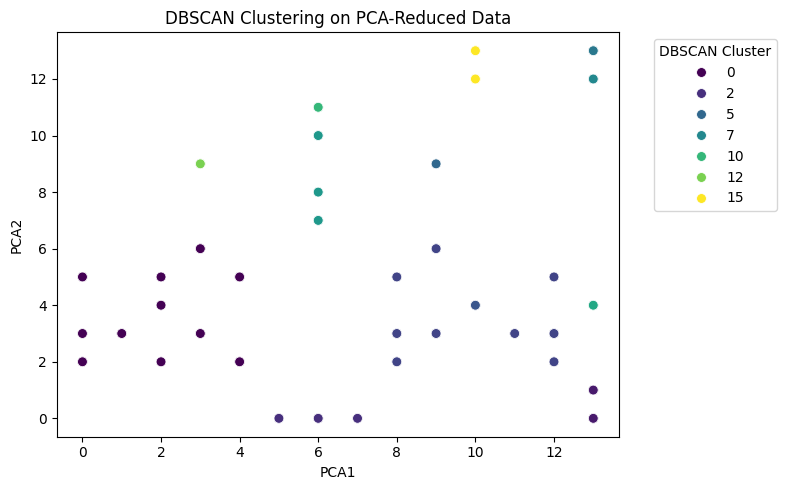

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure the correct DataFrame name
df_sampled = df_sampledd  # If you intended to use df_sample

# Check column names before plotting
print("Columns in dataset:", df_sampled.columns)

plt.figure(figsize=(8, 5))
sns.scatterplot(
    x=df_sampled.columns[0],  # Ensures correct column name
    y=df_sampled.columns[1],  
    hue="DBSCAN_Cluster",  
    data=df_sampledd,  
    palette="viridis",  
    s=50  
)

plt.xlabel("PCA1")
plt.ylabel("PCA2")
plt.title("DBSCAN Clustering on PCA-Reduced Data")

plt.legend(title="DBSCAN Cluster", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=df_pca[:, 0],  
    y=df_pca[:, 1], 
    hue=df_selected["DBSCAN_Cluster"], 
    palette="viridis",  
    alpha=0.6,  
    s=50  
)

plt.xlabel("PCA1")
plt.ylabel("PCA2")
plt.title("DBSCAN Clustering in 2D PCA Space")

plt.legend(title="Clusters", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

In [63]:
cluster_labels = df_sampledd["DBSCAN_Cluster"].values
unique_clusters = np.unique(cluster_labels)

n_clusters = len(unique_clusters[unique_clusters != -1])

n_noise = np.sum(cluster_labels == -1)

print(f"Number of clusters (excluding noise): {n_clusters}")
print(f"Number of noise points: {n_noise}")

Number of clusters (excluding noise): 16
Number of noise points: 0


**HIERARCHICAL**

In [38]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.cluster import AgglomerativeClustering

In [39]:
print(df_pca)

[[ 2.28578159  0.96653011]
 [ 2.28578159  0.96653011]
 [ 2.28578159  0.96653011]
 ...
 [-1.19414572 -0.29173222]
 [-1.19414572 -0.29173222]
 [-1.34802699 -0.36761975]]


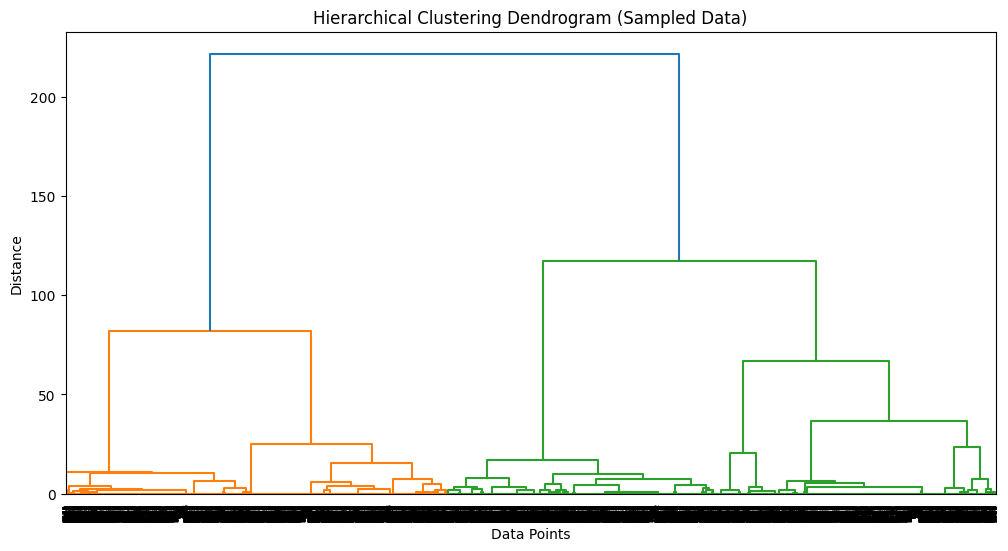

In [40]:
df_pca = pd.DataFrame(df_pca)

df_sampled = df_pca.sample(n=10000, random_state=42)

linkage_matrix = linkage(df_sampled, method="ward")

plt.figure(figsize=(12, 6))
dendrogram(linkage_matrix)
plt.title("Hierarchical Clustering Dendrogram (Sampled Data)")
plt.xlabel("Data Points")
plt.ylabel("Distance")
plt.show()

In [41]:
print(df_sampled.columns)

RangeIndex(start=0, stop=2, step=1)


In [42]:
df_sampled = df_sampled.rename(columns={0: 'PCA1', 1: 'PCA2'})

In [43]:
print(df_sampled.columns)

Index(['PCA1', 'PCA2'], dtype='object')


In [44]:
from sklearn.cluster import AgglomerativeClustering

df_pca_sample = df_pca.sample(n=10000, random_state=42)

from sklearn.cluster import AgglomerativeClustering

n_clusters = 4  
hierarchical = AgglomerativeClustering(n_clusters=n_clusters, linkage="ward")
df_pca_sample["Hierarchical_Cluster"] = hierarchical.fit_predict(df_pca_sample)

print(df_pca_sample["Hierarchical_Cluster"].value_counts())

Hierarchical_Cluster
0    2954
2    2932
1    2120
3    1994
Name: count, dtype: int64


In [45]:
df_pca_sample = df_pca_sample.rename(columns={0: 'PCA1', 1: 'PCA2'})

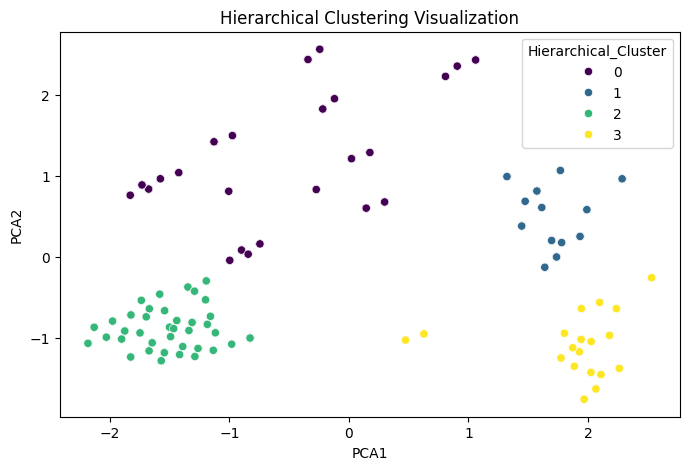

In [46]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x="PCA1", y="PCA2", hue="Hierarchical_Cluster", data=df_pca_sample, palette="viridis")
plt.title("Hierarchical Clustering Visualization")
plt.show()

In [69]:
print(df_sampled.columns)

Index(['job_class', 'educ_status', 'major_country', 'gender', 'age_group',
       'KMeans Cluster', 'DBSCAN_Cluster'],
      dtype='object')


In [64]:
df_sampled.columns = df_sampled.columns.astype(str)
df_pca_sample.columns = df_pca_sample.columns.astype(str)

df_sampledd = df_selected.sample(n=10000, random_state=42) 
df_sampledDBKMeans = df_pca.loc[df_sampledd.index]

df_sampledd["KMeans_Cluster"] = kmeans.fit_predict(df_sampledDBKMeans)  
df_sampledd["Hierarchical_Cluster"] = hierarchical.fit_predict(df_pca_sample)

print(df_sampledd[["DBSCAN_Cluster", "KMeans_Cluster", "Hierarchical_Cluster"]].head())

cluster_summary = df_sampled.groupby("Hierarchical_Cluster").mean()
print(cluster_summary)


KeyError: "['DBSCAN_Cluster'] not in index"

In [68]:
silhouette_dbscan = silhouette_score(df_sampledDBKMeans, df_sampledd["DBSCAN_Cluster"])
silhouette_kmeans = silhouette_score(df_sampledDBKMeans, df_sampledd["KMeans_Cluster"])
silhouette_hierarchical = silhouette_score(df_pca_sample, df_sampledd["Hierarchical_Cluster"])

print(f"Silhouette Score (DBSCAN): {silhouette_dbscan:.4f}")
print(f"Silhouette Score (KMeans): {silhouette_kmeans:.4f}")
print(f"Silhouette Score (Hierarchical): {silhouette_hierarchical:.4f}")

KeyError: 'DBSCAN_Cluster'